In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import seaborn as sns
import string

In [8]:
DF=pd.read_csv('spam.csv',encoding='latin-1')
DF.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [9]:
DF=DF.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
DF.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
DF.v1.value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [11]:
DF.shape

(5572, 2)

In [12]:
DF.v1.value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [13]:
DF.rename(columns={'v1':'target','v2':'text'},inplace=True)
DF.sample(10)

,target,text
1703,ham,Just taste fish curry :-P
1805,ham,God bless.get good sleep my dear...i will pray!
4109,ham,"Yo, you gonna still be in stock tomorrow/today..."
1379,spam,No. 1 Nokia Tone 4 ur mob every week! Just txt...
3948,ham,HMM yeah if your not too grooved out! And im l...
5094,ham,"Hi Shanil,Rakhesh here.thanks,i have exchanged..."
2640,ham,Pandy joined 4w technologies today.he got job..
3847,ham,Can you plz tell me the ans. BSLVYL sent via f...
2878,ham,U still painting ur wall?
1815,ham,Sian... Aft meeting supervisor got work 2 do l...


In [14]:
DF.duplicated().sum()

403

In [15]:
DF=DF.drop_duplicates(keep='first')
DF.duplicated().sum()

0

In [16]:
DF.shape

(5169, 2)

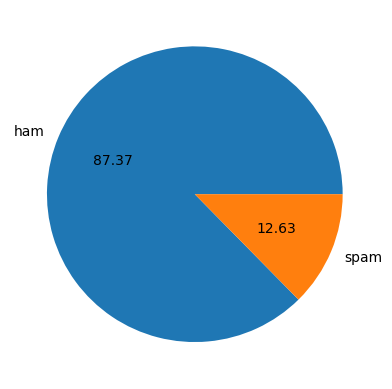

In [17]:
plt.pie(DF['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [19]:
DF['num_char']=DF['text'].apply(len)
DF.head()

,target,text,num_char
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
DF['num_word']=DF['text'].apply(lambda x:len(nltk.word_tokenize(x)))
DF.head()

,target,text,num_char,num_word
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
DF['num_sent']=DF['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
DF.head()

,target,text,num_char,num_word,num_sent
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
DF.describe()

,num_char,num_word,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 3000x1000 with 0 Axes>

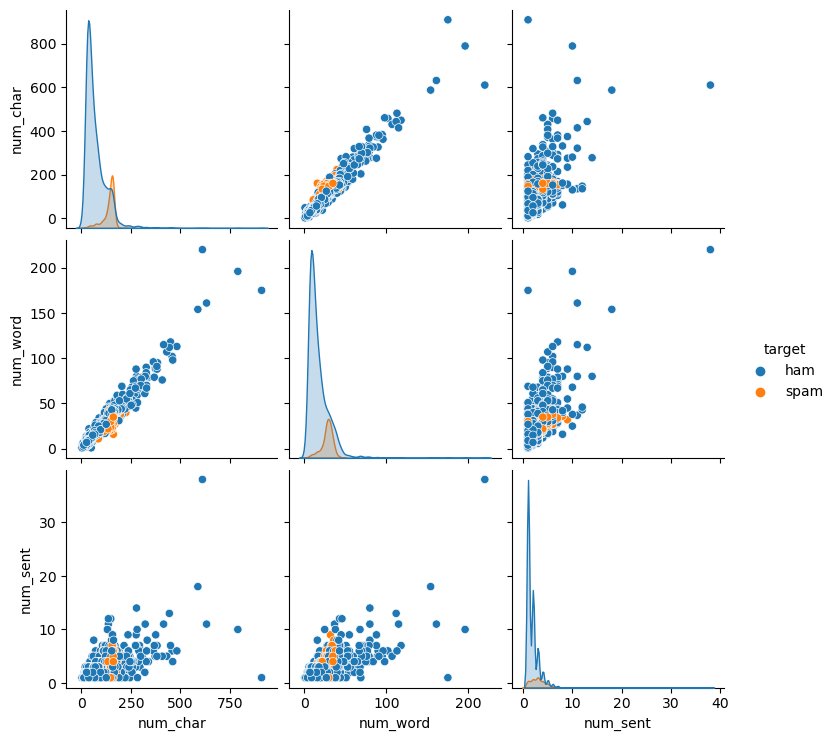

In [24]:
plt.figure(figsize=(30,10))
sns.pairplot(DF,hue='target')

In [26]:
DF.describe()

,num_char,num_word,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('sleeping')

'sleep'

In [28]:
def transform_text(text):
    text=text.lower()
    text= nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('English') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
      y.append(ps.stem(i))
            
    return " ".join(y)

In [29]:
DF.head(10)

,target,text,num_char,num_word,num_sent
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
6,ham,Even my brother is not like to speak with me. ...,77,18,2
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,31,2
8,spam,WINNER!! As a valued network customer you have...,158,32,5
9,spam,Had your mobile 11 months or more? U R entitle...,154,31,3


#  Splitting Data into Train and Test


In [38]:
X = DF["text"]
Y = DF["target"]

train_data,test_data,train_label,test_label = train_test_split(X, Y, test_size=0.30, random_state=42)

In [39]:
print("train_data: ",train_data.shape)
print("train_text: ",train_label.shape)
print("test_data: ",test_data.shape)
print("test_target: ",test_label.shape)

train_data:  (3618,)
train_text:  (3618,)
test_data:  (1551,)
test_target:  (1551,)


 Model


In [40]:

model_lr = Pipeline([("tfidf",TfidfVectorizer()),
                           ("model",LogisticRegression())])

In [41]:
model_lr.fit(train_data,train_label)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('model', LogisticRegression())])

In [42]:

y_pred = model_lr.predict(test_data)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [43]:

print("Train Accuracy Score : ",model_lr.score(train_data,train_label))
print("Test Accuracy Score : ",accuracy_score(y_pred,test_label))

Train Accuracy Score :  0.9662797125483693
Test Accuracy Score :  0.965183752417795


In [44]:
cm = pd.DataFrame(confusion_matrix(y_pred,test_label),index=["ham","spam"], columns=["ham","spam"])
cm
    

,ham,spam
ham,1328,51
spam,3,169


In [45]:
print(classification_report(y_pred,test_label))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1379
        spam       0.77      0.98      0.86       172

    accuracy                           0.97      1551
   macro avg       0.88      0.97      0.92      1551
weighted avg       0.97      0.97      0.97      1551



In [46]:
print("Corss _Val_Score Train Data : ",cross_val_score(model_lr,train_data,train_label,cv=5).mean())
print("Corss _Val_Score Test Data : ",cross_val_score(model_lr,test_data,test_label,cv=5).mean())
     

Corss _Val_Score Train Data :  0.9601976876580851
Corss _Val_Score Test Data :  0.9322954050409707
